In [1]:
import os

import discoursegraphs as dg

In [2]:
%matplotlib inline

In [3]:
TUEBADZ8_FILE = os.path.expanduser(
    '~/corpora/tuebadz-8.0/tuebadz-8.0-mit-NE+Anaphern+Diskurs.exml.xml')

In [4]:
corpus = dg.read_exportxml(TUEBADZ8_FILE)

In [5]:
doc = corpus.next()

In [11]:
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


Couldn't import dot_parser, loading of dot files will not be possible.


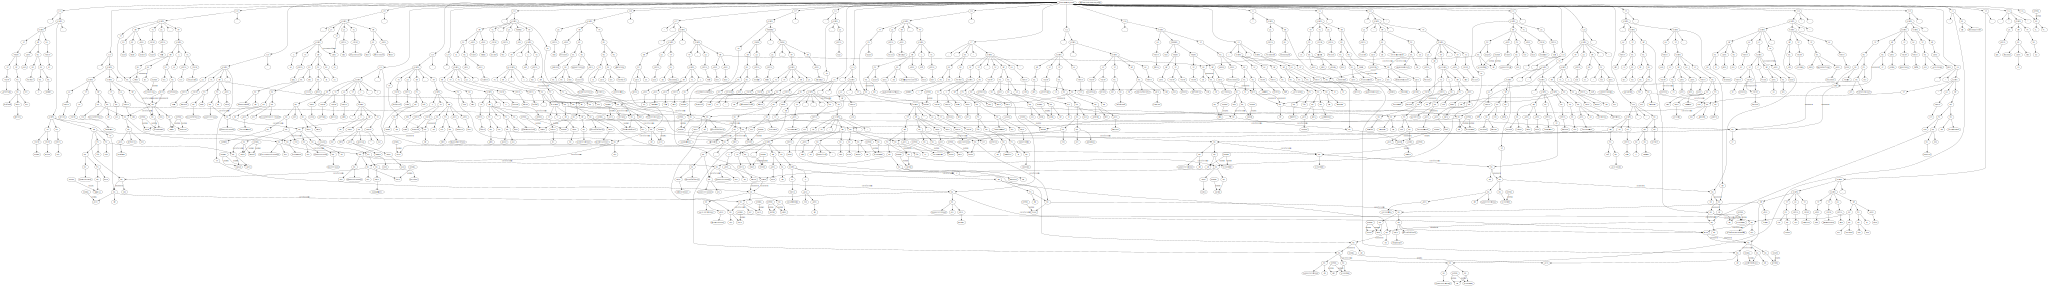

In [8]:
%dotstr dg.print_dot(doc)

In [9]:
# for i, doc in enumerate(corpus):
#     try:
#         dg.print_dot(doc)
# #         print i, "sucess"
#     except:
#         print i, "failed"